Actividad 6:Redes neuronales-Juan Carlos Girón Meza-2109598-N1/LMV

In [1]:
#Cargar las librerias

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Empezamos a generar los datos
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

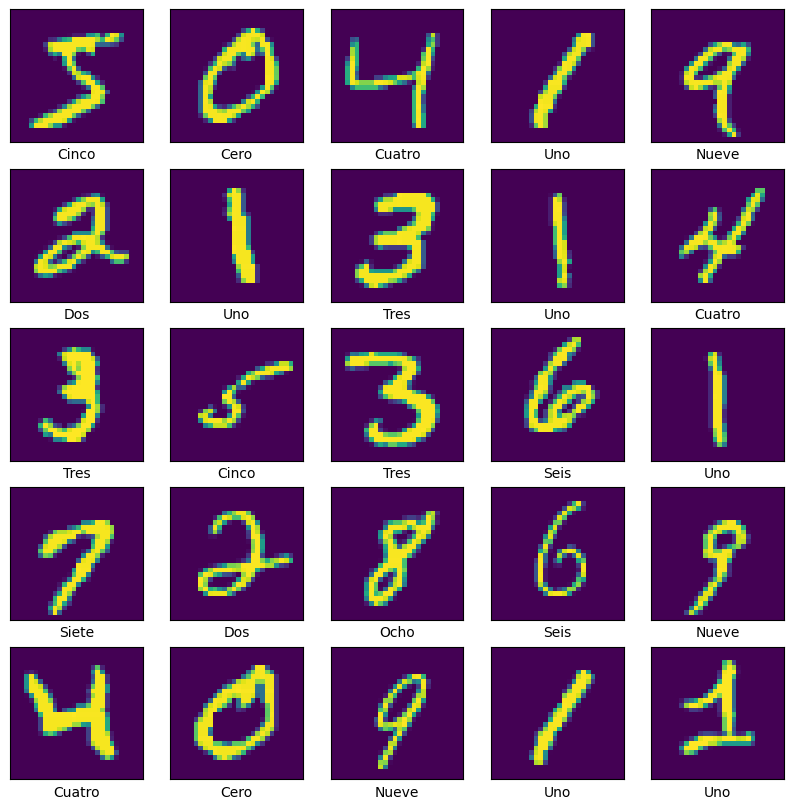

In [4]:
#Se verifica los datos
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
# Crear la base convolucional con Conv2D Y MaxPooling2D
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [7]:
#Se agregan las capas densas en la parte superior
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
#Compilamos y entrenamos nuestor modelo de red neuronal convolucional
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 61s 31ms/step - loss: 0.1477 - accuracy: 0.9538 - val_loss: 0.0520 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0379 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0332 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0303 -

313/313 - 3s - loss: 0.0370 - accuracy: 0.9918 - 3s/epoch - 11ms/step


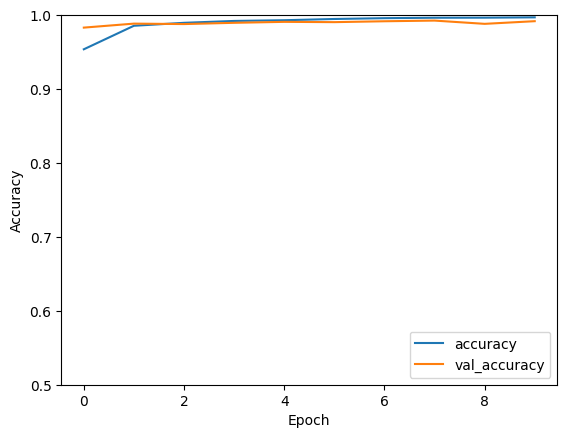

In [10]:
#Se evalua el modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.9918000102043152


In [12]:
predicciones = model.predict(test_images)

313/313 [==============================] - 5s 15ms/step


In [13]:
#Predicción 1
predicciones[25]

array([21.367476 , -8.431553 , -5.5660033, -7.923324 , -3.5730598,
       -5.5980043,  2.4949696, -9.600897 , -2.901315 , -1.7244834],
      dtype=float32)

In [14]:
np.argmax(predicciones[25])

0

In [15]:
#Valor real
test_labels[25]

0

In [16]:
#Predicción 2
predicciones[6]


array([-17.624743 ,  -4.8430877,  -4.9367404, -13.069317 ,  17.833055 ,
        -6.1169353,  -7.3801756,  -1.2081494,   3.8910608,   4.211598 ],
      dtype=float32)

In [17]:
np.argmax(predicciones[6])

4

In [18]:
#Valor real
test_labels[6]

4

In [19]:
#Predicción 3
predicciones[128]

array([-14.058016 , -10.89763  ,  -4.3700466,   5.4969835, -13.607728 ,
       -10.606919 ,  -9.104108 ,  -9.986938 ,  28.413221 ,  -1.3558685],
      dtype=float32)

In [20]:
np.argmax(predicciones[128])

8

In [21]:
#Valor real
test_labels[128]

8

In [22]:
#Predicción 4
predicciones[160]

array([-18.314632 ,   8.107105 ,  -3.469656 , -23.525705 ,  18.110176 ,
        -9.384457 ,   2.8418078,  -5.166648 ,   3.6638837,  -3.596705 ],
      dtype=float32)

In [23]:
np.argmax(predicciones[160])

4

In [24]:
#Valor real
test_labels[160]

4

In [25]:
#Predicción 5
predicciones[400]

array([ 0.61087525, -8.452299  , 16.011152  , -2.7526422 , -7.7213836 ,
       -6.24133   , -8.284041  , -1.8157268 ,  4.3624043 , -6.7672753 ],
      dtype=float32)

In [26]:
np.argmax(predicciones[400])

2

In [27]:
#Valor real
test_labels[400]

2


¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
La cantidad de epocas de entrenamiento que use son 10

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué? si hubo mejoramiento en las imagenes, se logra apreciar sus principales caracteristicas